In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Questão 1:

### Equação do calor:
Temos $-\nabla \cdot (\kappa \nabla T) = 0$ Sujeito às seguintes condições de limite:

$$ T(x, 0) = T(x, 1) = a $$
$$ T(0, y) = b $$
$$ -\kappa \frac{\partial T}{\partial x}(1, y) = h(T - T_{out}) $$
onde $(0 < x < 1)$ e $(0 < y < 1)$.
### Primeiro, qual é o tipo dessa equação?
A equação do calor é dada por: $-\nabla \cdot (\kappa \nabla T) = -\kappa \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right)$. Escrevendo de uma forma mais geral, temos:
$$ a \frac{\partial^2 T}{\partial x^2} + 2b \frac{\partial^2 T}{\partial x \partial y} +c \frac{\partial^2 T}{\partial y^2} = 0$$
Nesta forma, os coeficientes são: $a = -\kappa $; $ b = 0 $; $ c = -\kappa $, com isso:
$b^2 - 4ac = 0^2 - 4.(-\kappa).(-\kappa) = -4\kappa^2$, logo é uma equação elíptica.
### Coisas relacionada para resolver o problema, a grade, a discretização, matrizes,...:
##### Discretização da Região para uma Grade:
Vamos dividir a região do problema em uma grade para que possamos aproximadar os valores nos pontos dessa grade.
Definição dos Parâmetros:  
$N_x$ e $N_y$ é o número de pontos em cada direção tanto para $x$ quanto para $y$.  
$h_x = \frac{L_x}{N_x+1}$ e $h_y = \frac{L_y}{N_y+1}$ é o passo da grade em relação a x e y.
#### Discretização da EDP:
Usando a fórmula de diferenças finitas centradas para a segunda derivada, temos:
$$ \frac{\partial^2 T}{\partial x^2}(x_i, y_j) = \frac{T(x_{i+1}, y_j) - 2T(x_i, y_j) + T(x_{i-1}, y_j)}{h_x^2} + O(h_x^2)$$
$$\frac{\partial^2 T}{\partial y^2}(x_i, y_j) = \frac{T(x_i, y_{j+1}) - 2T(x_i, y_j) + T(x_i, y_{j-1})}{h_y^2} + O(h_y^2) $$

Substituímos essas aproximações na equação do calor $-\nabla(\kappa \nabla T) = 0$:

$$ -\left(\frac{\partial}{\partial x}\left(\kappa \frac{\partial T}{\partial x}\right) + \frac{\partial}{\partial y}\left(\kappa \frac{\partial T}{\partial y}\right)\right) = 0 $$

Agora, substituímos as aproximações das derivadas parciais:

$$ -\left(\frac{\kappa}{h_x^2}(T_{i+1,j} - 2T_{i,j} + T_{i-1,j}) + \frac{\kappa}{h_y^2}(T_{i,j+1} - 2T_{i,j} + T_{i,j-1})\right) = 0 $$
$$ -\frac{\kappa}{h_x^2}(T_{i+1,j} - 2T_{i,j} + T_{i-1,j}) - \frac{\kappa}{h_y^2}(T_{i,j+1} - 2T_{i,j} + T_{i,j-1}) = 0 $$

Multiplicamos ambos os lados por $-h_x^2h_y^2$ para simplificar:

$$\kappa(h_y^2(T_{i+1,j} - 2T_{i,j} + T_{i-1,j}) + h_x^2(T_{i,j+1} - 2T_{i,j} + T_{i,j-1})) = 0 $$

Rearranjando os termos, obtemos:

$$ \kappa(h_y^2T_{i+1,j} - 2h_y^2T_{i,j} + h_y^2T_{i-1,j} + h_x^2T_{i,j+1} - 2h_x^2T_{i,j} + h_x^2T_{i,j-1}) = 0 $$

Simplificando ainda mais, obtemos:

$$ \kappa h_y^2T_{i+1,j} - 2\kappa h_y^2T_{i,j} + \kappa h_y^2T_{i-1,j} + \kappa h_x^2T_{i,j+1} - 2\kappa h_x^2T_{i,j} + \kappa h_x^2T_{i,j-1} = 0 $$

Finalmente, agrupando os termos, chegamos à forma discretizada da equação do calor:

$$ 4\kappa T_{i,j} - \kappa T_{i-1,j} - \kappa T_{i+1,j} - \kappa T_{i,j-1} - \kappa T_{i,j+1} = 0 $$

Com a condição de contorno de Neumann, a equação discretizada é dada por:

$$ 4\kappa T_{i,j} - \kappa T_{i-1,j} - \kappa T_{i+1,j} - \kappa T_{i,j-1} - \kappa T_{i,j+1} = h(T_{out} - T_{i,j}) $$

onde $T_{out}$ é a temperatura externa. Adicionalmente, com a condição de contorno de Neumann, a equação pode ser expressa como:

$$ 4\kappa T_{i,j} - \kappa T_{i-1,j} - \kappa T_{i+1,j} - \kappa T_{i,j-1} - \kappa T_{i,j+1} = h(T_{\text{out}} - T_{i,j}) - h\kappa(T_{out} - T_{N,j})$$

#### Discretização das Condições de Contorno:
##### Condições de Contorno de Dirichlet:
As condições de contorno de Dirichlet indicam valores fixos para a variável dependente nos limites do domínio. temos as seguintes condições:

$$ T(x, 0) = a $$
$$ T(x, 1) = a $$
$$ T(0, y) = b $$

Podemos discretizar essas condições diretamente na matriz $T$. Para o caso $ T(x, 0) = a $ implica que a primeira linha da matriz $ T $ é definida como $ T_{i,0} = a $ para todos os $ i $. De maneira análoga, as outras condições podem ser tratadas para as últimas linhas e colunas, respectivamente.

##### Condição de Contorno de Neumann:

A condição de contorno de Neumann envolve derivadas normais da variável dependente nos limites do domínio.

$$ -\kappa \frac{\partial T}{\partial x}(1, y) = h(T - T_{out}) $$

Podemos discretizar isso usando a diferença finita centrada para a derivada parcial em relação a $ x $:

$$ -\kappa \frac{T_{i+1,j} - T_{i-1,j}}{ 2 h_x} = h(T_{out} - T_{i,j}) $$

Rearranjando, obtemos:

$$ -\kappa (T_{i+1,j} - T_{i-1,j}) = 2h h_x (T_{out} - T_{i,j}) $$

Podemos aplicar isso para os pontos na borda onde a condição de contorno de Neumann é válida.

### Resolvendo a matriz para o caso (Nx=3, Ny=4) :
##### Vamos criar a matriz T (caso Nx=3, Ny=4) e o vetor do lado direito b (termos independentes):

A matriz T é dada por:
$$ T = \begin{bmatrix} a & a & a & a \\
b & 0 & 0 & b \\
b & 0 & 0 & b \\
a & a & a & a \\
\end{bmatrix} $$

O vetor b é:
$$b = \begin{bmatrix}
a \\
b + h\kappa T_{\text{out}} \\
b \\
a + h\kappa T_{\text{out}} \\
\end{bmatrix} $$

A matriz A (coeficientes das variáveis $T_{i,j}$ é obtida a partir da equação discretizada:
$$A = \begin{bmatrix}
    4\kappa & -\kappa & -\kappa & 0 \\
    -\kappa & 4\kappa & 0 & -\kappa \\
    -\kappa & 0 & 4\kappa & -\kappa \\
    0 & -\kappa & -\kappa & 4\kappa \\ \end{bmatrix} $$
Agora, é só  resolver o sistema linear  $A \mathbf{T} = \mathbf{b}$ para encontrar os valores discretizados de $T$.

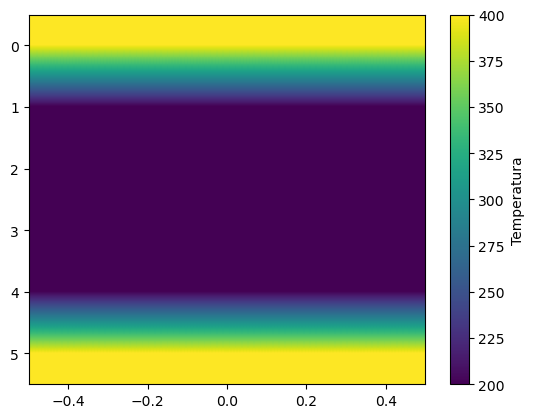

In [2]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

def create_matrix_T(Nx, Ny, a, b):
    # Cria a matriz T com condições de contorno de Dirichlet
    T = np.full((Ny + 2, Nx + 2), a)
    T[1:-1, 0] = b
    T[1:-1, -1] = b
    return T

def create_vector_b(Nx, Ny, h, Tout, kappa, T):
    # Cria o vetor b com condições de contorno de Neumann
    b = np.zeros((Ny, Nx))
    b[:, -1] = -h * (Tout - T[1:-1, -1])
    return b.flatten()

def create_matrix_A(Nx, Ny, kappa):
    # Cria a matriz A com coeficientes para a equação do calor discretizada
    A = np.zeros((Nx * Ny, Nx * Ny))
    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            row = (i - 1) * Nx + j - 1
            A[row, row] = 4 * kappa
            if j > 1:
                A[row, (i - 1) * Nx + j - 2] = -kappa
            if j < Nx:
                A[row, (i - 1) * Nx + j] = -kappa
            if i > 1:
                A[row, (i - 2) * Nx + j - 1] = -kappa
            if i < Ny:
                A[row, i * Nx + j - 1] = -kappa
    return A

def solve_heat_equation(Nx, Ny, a, b, h, Tout, kappa):
    # Cria as matrizes T, A e o vetor b
    T = create_matrix_T(Nx, Ny, a, b)
    A = create_matrix_A(Nx, Ny, kappa)
    b = create_vector_b(Nx, Ny, h, Tout, kappa, T)
    # Achata T em um array 1D
    T_flat = T[1:-1, 1:-1].flatten()
    # Resolve o sistema linear Ax = b
    T_flat_solution = solve(A, b)
    # Reformula a solução de volta para a matriz 2D
    T[1:-1, 1:-1] = T_flat_solution.reshape((Ny, Nx))
    return T

# Parâmetros:
Nx = 3
Ny = 4
a = 400  # Valor de exemplo
b = 200  # Valor de exemplo 
h = 0.1  # Valor de exemplo 
Tout = 100  # Valor de exemplo
kappa = 0.01  # Valor de exemplo 

result_matrix = solve_heat_equation(Nx, Ny, a, b, h, Tout, kappa)
plt.imshow(result_matrix[:, -1, np.newaxis], interpolation='bilinear', aspect='auto')
plt.colorbar(label='Temperatura')
plt.show()

# Questão 2:

Temos o problema: $ εu'' + 2(1 − x^2)u' + u^2 = 1$ com condições de contorno: $u(− 1) = u(1) = 0$ e $Φ_{j}=sin(\pi j x)$

### Reformulação da Equação:*
Reescrevendo a equação, isolamos a segunda derivada da função $u(x)$:
$$\frac{\mathrm{d}^2u}{\mathrm{d}x^2} = \frac{1 - 2(1-x^2)u - u^2}{\epsilon}$$

### Representação Aproximada da Solução:

No método dos elementos finitos, a solução aproximada $u_h(x)$ é expressa como uma combinação linear de funções de base, denotada por $\varphi_j(x)$. Cada termo dessa combinação é ponderado por um coeficiente $c_j$. A expressão geral para a solução aproximada é dada por:

$$u_h(x) = \sum_{j=1}^N c_j \varphi_j(x)$$

onde $N$ é o número total de funções de base.

Ao substituir essa representação aproximada na equação diferencial original, obtemos um sistema linear de equações $A\vec{c} = \vec{f}$, onde $A$ é a matriz do sistema, $\vec{c}$ é o vetor dos coeficientes $c_j$, e $\vec{f}$ é um vetor dependente das condições do problema original e obtido através de integração numérica.

### Sistema Linear de Equações:
O problema é formulado como um sistema linear de equações:
$$A\vec{c} = \vec{f}$$
Onde:
- $\vec{c}$ é o vetor dos coeficientes $c_j$.
- $A$ é a matriz do sistema.
- $\vec{f}$ é um vetor que depende das condições do problema original e é obtido através de integração numérica.
Resolver este sistema linear, ou seja, encontrar os valores dos coeficientes $\vec{c}$, é crucial para determinar a solução aproximada $u_h(x)$ da equação diferencial. O método dos elementos finitos utiliza técnicas numéricas para resolver eficientemente esse sistema e encontrar uma solução aproximada para a equação diferencial dada.
### Cálculo da Matriz A:

Dada a expressão geral $u_h(x) = \sum_{j=1}^N c_j \varphi_j(x)$, onde $\varphi_j(x)$ é uma função de base, podemos expressar a derivada de $\varphi_j(x)$ em relação a $x$, denotada por $\frac{d\varphi_j}{dx}$.

Se $\varphi_j(x) = \sin(j \pi x)$, então:

$$\frac{d\varphi_j}{dx} = j \pi \cos(j \pi x)$$

A integral para $A_{ij}$ é então calculada como:
$$A_{ij} = \int_{-1}^{1} (j \pi \cos(j \pi x)) \cdot (i \pi \cos(i \pi x)) \, dx$$

Usando a identidade trigonométrica $cos(a) \cdot cos(b) = \frac{1}{2} (cos(a+b) + cos(a-b))$, simplificamos a integral:

$$A_{ij} = \frac{j i \pi^2}{2} \int_{-1}^{1} (\cos((j+i)\pi x) + \cos((j-i)\pi x)) \, dx$$

A integração leva a:
$$A_{ij} = \frac{j i \pi^2}{2} \left[\frac{\sin((j+i)\pi x)}{(j+i)\pi} + \frac{\sin((j-i)\pi x)}{(j-i)\pi}\right]_{-1}^{1}$$

Simplificando usando $\sin(n \pi) = 0$ para $n \in \mathbb{N}$, obtemos:

$$A_{ij} = \frac{j i \pi^2}{2} \left(\frac{\sin((j-i)\pi)}{(j-i)\pi} - \frac{\sin((j+i)\pi)}{(j+i)\pi}\right)$$

Dado que $j$ e $i$ são inteiros, então $j+i$ e $j-i$ também são inteiros, levando $\sin((j+i)\pi) = \sin((j-i)\pi) = 0$. Portanto, a integral se reduz a zero:
$$A_{ij} = 0$$

Isso implica que, para as funções de base consideradas $\varphi_j(x) = \sin(j \pi x)$, a matriz $A$ é uma matriz diagonal com todos os elementos fora da diagonal sendo zero. A diagonal principal contém os elementos $A_{jj} = j^2 \pi^2$.

### Calculando o vetor $\vec{f}$

O vetor $\vec{f}$ é uma representação discreta da função $f(x)$ nos pontos de interpolação associados aos elementos do domínio. Cada componente $f_i$ do vetor $\vec{f}$ é obtida através da integral:

$$f_i = \int_{-1}^{1} f(x) \varphi_i \, dx$$

onde $\varphi_i(x)$ são as funções de base associadas aos elementos do domínio.

A expressão para $f(x)$ é definida pela equação diferencial original:

$$f(x) = \frac{1 - 2(1-x^2)u - u^2}{\epsilon}$$

Para calcular numericamente $u(x)$ nos pontos do domínio, resolvemos a equação diferencial pelo método de .......... (Não consegui entender essa parte)
### Resolução do sistema linear:
A solução aproximada $u_h(x)$ é expressa como uma combinação linear das funções de base multiplicadas pelos coeficientes desconhecidos:
$$u_h(x) = \sum_{j=1}^{N} c_j \varphi_j(x)$$
A matriz $A$ e o vetor $\vec{f}$ são conhecidos, e o objetivo é resolver o sistema linear $A\vec{c} = \vec{f}$ para determinar os coeficientes $\vec{c}$ e então aproximar a função. 

In [3]:
def phi(x, j):
    return np.sin(j * np.pi * x)

def calculate_A(N):
    return np.diag([(i + 1)**2 * np.pi**2 for i in range(N)])

def calculate_f(x, epsilon, u_h):
    return (1 - 2 * (1 - x**2) * u_h - u_h**2) / epsilon

#def system_of_odes(t, y, N, c):